# Lab 1 Solutions

### Objectives
In this lab, we'll 
- Review the computational infrastructure around our data science environments,
- Go through the process of ensuring that we have a Python environment set up for this class with the proper installed packages
- Within our environment, we'll review the basic data science operations in Python, and introduce some tips and tricks. 


```{admonition} Take a Deep Breath
Don't freak out if stuff presented here is brand new to you! Ask a friend, google around (esp. stack overflow) and find a solution. All of these examples can be done in a few lines of code.
```

# Part I: Computational Ecosystem 

In the space below, or in your own assignment, answer the following: 

## Question A

Describe the following terms, and point out the differences between them. Feel free to look things up.
- python:
- the terminal:
- the file system:
- jupyter:
- an IDE: 
- a text editor:
- git: 
- PATH: 


I am writing this lab in a notebook. We'll be discussing the pros and cons of notebooks in class. Below, I'm going to check which python installation on my computer is being pointed to within my PATH. As a reminder, you can see your full path by echoing it from the terminal. Within a notebook, that looks like this:

In [2]:
!echo $PATH

/Users/ipasha/anaconda3/bin:/Users/ipasha/anaconda3/condabin:/anaconda3/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Users/ipasha/anaconda3/bin:.


```{note}
The "!" in my notebook allows me to run terminal commands from a notebook; you don't need this symbol when running commands in an actual terminal.
```

I can check my python as follows:

In [3]:
!which python

/Users/ipasha/anaconda3/bin/python


We can see that calls to `python` are triggering the python installed in `anaconda3`, which is what we want (see the installation video for more details). If your call to `which python` in the terminal returns something like `usr/bin/python`, then something has likely gone wrong with your installation. There are some troubleshooting steps suggested in the installation video. 

## Setting up an Environment. 

We can think of packages as programs installed on our computer. But what if one of my projects needs Photoshop 14.0, and another needs a feature that was only available in Photoshop 12.5.2? An environment is the system on which your code is being executed. When you fire up a terminal, this is usually your *base* environment, the default one for your *user* on a given computer system. But rather than always installing programs in this base installation, we can create custom environments for each of our projects. We can then install the exact dependencies for those projects within our environments, and we'll know they won't mess with each other. 

For this class, we're going to be doing a lot of package installations. To ensure we are all on the same page and are working with the same tools, we're going to use a `conda environment` to maintain versioning. Note: there are multiple environment creation tools/methods. Conda environments are the predominant standard in astronomy, hence their use here. 

In your terminal, type the following:
```{note}
If you are on WINDOWS, you NEED to use the ANACONDA TERMINAL. NOT YOUR WINDOWS POWER SHELL/COMMAND PROMPT. Search your pc for anaconda and you'll see an anaconda launcher (if you followed the installation video correctly). From there, you should be able to find an anaconda terminal/prompt. That's where you should do anything whenever I say "from your terminal".
```



In [ ]:
conda create -n a330 python=3.8 

Once you run this, answer "y" to the prompts, and your new environment will be installed.

```{note}
The above command may take several minutes to execute.
```


Next, we want to activate this environment (still in our terminal). We do this as follows:

In [ ]:
conda activate a330

When you do so, you should see the left hand edge of your prompt switch from (base) to (a330). 

Next, let's make an alias so that getting into our a330 environment is a snap. We're going to access a file called `.bash_profile`, which allows us to set aliases and environment variables. This file is located in your home directory, so I can print mine here:

In [6]:
!more ~/.bash_profile

# >>> conda init >>>
# !! Contents within this block are managed by 'conda init' !!
__conda_setup="$(CONDA_REPORT_ERRORS=false '/anaconda3/bin/conda' shell.bash hook 2> /dev/null)"
if [ $? -eq 0 ]; then
    \eval "$__conda_setup"
else
    if [ -f "/anaconda3/etc/profile.d/conda.sh" ]; then
# . "/anaconda3/etc/profile.d/conda.sh"  # commented out by conda initialize
        CONDA_CHANGEPS1=false conda activate base
    else
        \export PATH="/anaconda3/bin:$PATH"
    fi
fi
unset __conda_setup
# <<< conda init <<<
export BASH_SILENCE_DEPRECATION_WARNING=1
export PATH=$PATH:/Users/ipasha/anaconda3/bin
export PYTHONPATH=/Users/ipasha/anaconda3/bin/python3.8
PATH=$PATH:.
alias python='python3'


>/ipasha/.bash_profile

Notice above I use the `~` which is a shorthand for home directory. On my computer, the default home directory for my user is `/Users/ipasha/`. 



This file has some conda stuff in it at the top, as well as some path and python path exports, as well as an alias. 

Yours should also have the conda init stuff, if you installed anaconda properly. Using your text editor of choice, add a line to this file that reads `alias a330='conda activate a330'`. 

```{sidebar} Using Vi/vim
Vi/vim is a built-in terminal program that allows for the editing of files. It is helpful to learn, especially when working on remote servers. We'll go into it more later, but here is a step by step for performing the above step with vim. 
- First: from the terminal, type `vim ~/.bash_profile` and hit enter. This will open the editor. If 'vim' isn't recognized, try 'vi'. 
- Next: Press the "I" key to open insert mode. Move your cursor with the arrow keys to the desired line, then type in the alias command shown to left. 
- Finally: Press `esc` to get out of insert mode, then type `:wq` and hit enter in order to "write" then "quit". 
```



Now, from your terminal, source your profile by typing `source ~/.bash_profile`. You're good to go! Test that you can activate your environment by typing `a330` and hitting enter. 

```{note}
To deactivate, just type `conda deactivate`. 
```



## Adding Jupyter

You'll be using notebooks during this class, and we need to make sure that we can access our new environment from within Jupyter notebook. To ensure this, we're going to do the following:

First, make sure your environment is activated. 

Then, type:

In [ ]:
conda install -c anaconda ipykernel

This ensures we can select different kernels inside jupyter. A kernel is basically "the thing that is python", the root thing being run on your system when you use python. By creating environments, we're creating different unique kernels, and we can now get to them within our notebooks. 

Now, run the following:

In [ ]:
python -m ipykernel install --user --name=a330

Once you've done this, you should have the ability to access your new environment from within Jupyter. We can test this as follows: 
- First, open a new terminal window, and activate your environment (if you made the alias, this means typing `a330` in your terminal. 
- Next, type `jupyter lab` to open jupyter lab. If for some reason you don't have jupyter lab yet, you can install it now with `conda install -c conda-forge jupyterlab`. 
- Once you have lab open, there should be a 'launcher' page, with one option being to create a new notebook using python -- you *should* see your environment listed there. 
- If you don't hit refresh on the webpage just in case. 
- You can also click on the option to open a python3 notebook. Inside, in the top right corner, it should say your current environment (probably Python 3). Clicking that, it should give you the option to choose a different environment, and your environment should be listed there. 

```{note}
If you already had a lab open, you'll have to hit refresh to get it to show up. 
```
## Installing Packages

Now that we have our environment, we're going to install the set of packages we need for this class. We may need more of them as the semester goes on, but for now, do the following (in your terminal, within your environment). 

In [ ]:
conda install -n a330 numpy scipy astropy matplotlib 

(again, hitting "y" when prompted). Again, this step might take a minute or so to run.

Congrats, you now have an environment set up for this class, and can jump in and out of it at will, either in your terminal, or within a Jupyter notebook.

```{admonition} Hot Tip
It's highly recommended you do these steps anytime you start a new research project. Up front, you may not know all the dependencies that will arise, but as you go along, if you keep your work to that environment, you'll be able to carefully control which versions of which packages you're accessing at all times.
```



# Part II: Python Review

In this section, I'll ask you to perform some pythonic operations to get back into the swing of things if it has been a little while. 

For this assignment, please carry out your work in a Jupyter notebook, with the questions labeled and your output shown. You'll submit this notebook via Github, but we will discuss how to perform this step in class.

## Question 1
Create a 2D array of dimensions 1000 x 1000, in which the values in each pixel are random-gaussian distributed about a mean of 10, with a sigma of 2, and then use matplotlib to display this image. Make sure (0,0) is in the lower lefthand corner. 

In [145]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

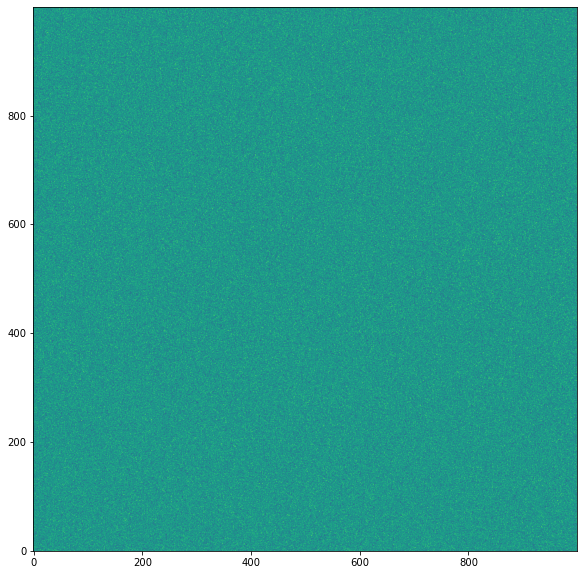

In [146]:
# Solution 1
mu = 10
sigma = 2
Gauss = stats.norm(loc=mu,scale=sigma)
array = Gauss.rvs((1000,1000))
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(array,origin='lower');

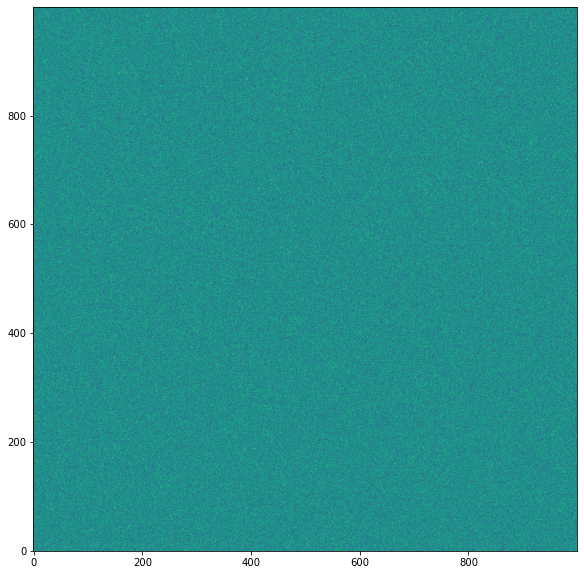

In [147]:
#Solution 2:
array_np = np.random.normal(loc=10,scale=2,size=(1000,1000))
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(array_np,origin='lower');

## Question 2

The distribution of pixels in your above image should not have many outliers beyond 3-sigma from the mean, but there will be some. Find the location of any 2 sigma outliers in the image, and highlight them by circling their location. 
Confirm that the fraction of these out of the total number of pixels agrees with the expectation for a normal distribution.

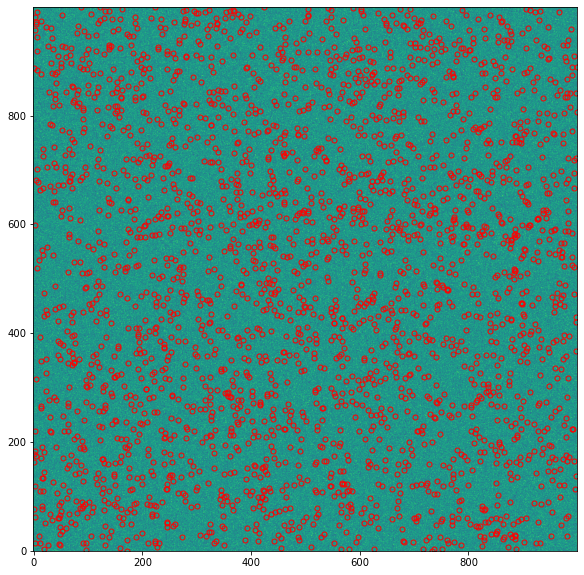

In [149]:
# Solution 
outliers = np.where((array>mu+3*sigma)|(array<mu-3*sigma))
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(array,origin='lower')
ax.plot(outliers[0],outliers[1],'o',ms=5,color='None',mec='r');

## Question 3

When dealing with astronomical data, it is sometimes advisable to not include outliers in a calculation being performed on a set of data (in this example, an image). We know, of course, that the data we're plotting ARE coming from a gaussian distribution, so there's no reason to exclude, e.g., 3-sigma outliers, but for this example, let's assume we want to. 

Create a numpy masked array in which all pixels that are > 3$\sigma$ from the image mean are masked. Then, calculate the mean and sigma of the new masked array. 

In [34]:
# Solution 
clipped_array = np.ma.masked_where((array>mu+3*sigma)|(array<mu-3*sigma),array)
print(f'Clipped Mean: {np.mean(clipped_array):.3f}  |  Clipped Sigma: {np.std(clipped_array):.3f}')

Clipped Mean: 9.999  |  Clipped Sigma: 1.973


In [154]:
# solution 2
m= (array < mu+3.*sigma) & (array>mu-3.*sigma)

mn = np.mean(array[m])
st = np.std(array[m])
print('Clipped mean; {:0.3f};  Clipped Sigma: {:0.3f}'.format(mn,st))

Clipped mean; 10.000;  Clipped Sigma: 1.971


As expected, clipping the outliers of this distribution does not affect the mean in any strong way, but does noticably decrease $\sigma$. 

## Question 4:

Using Array indexing, re-plot the same array from above, but zoom in on the inner 20% of the image, such that the full width is 20% of the total. Note: try not to hard code your indexing. You should be able to flexibly change the percentage. For this one, use a white-to-black color map.


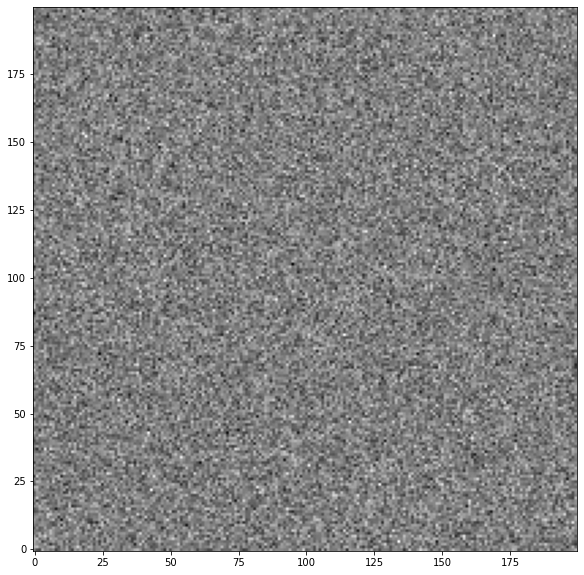

In [150]:
# solution 
cent = int(array.shape[0] / 2)
perc = int(0.2 * array.shape[0]*0.5)
cropped_array = array[cent-perc:cent+perc,cent-perc:cent+perc]
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(cropped_array,origin='lower',cmap='gray_r');

As expected, our image is now 200 by 200 pixels across. Note that our new image has its own indexing. A common "gotcha" when working with arrays like this is to index in, but then try to use indices found (e.g., via `where()`) in the larger array on the cropped in version, which can lead to errors.

## Question 5

Often, we have an expression to calculate of the form 

$$
\sum_i \sum_j a_i b_j
$$

Your natural impulse for coding this double sum might look like this:

In [ ]:
total = 0
for i in a:
    for j in b:
         total+= i*j

which, mathematically, makes sense! But as it turns out, there's a way we can do this without any loops at all --- and when $\vec{a}$ and $\vec{b}$ get long, this becomes hugely important in our code.

The trick we're going to use here is called [array broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html), which you can read about at the link if you're not already familar. I'm going to give you $\vec{a}$ and $\vec{b}$ below. For this exercise, calculate the double sum indicated above without the use of a for-loop. 

```{admonition} Hint
The command `np.newaxis` will be useful here, or for a slightly longer solution, try `np.repeat` and `reshape()`. 
```

In [35]:
a = np.array([1,5,10,20])
b = np.array([1,2,4,16])

# Solution
output = np.sum(a[:,np.newaxis]*b)

In [37]:
output

828

We can confirmed the above worked using our slow loop:

In [40]:
total = 0
for i in a:
    for j in b:
         total+= i*j
total

828

We can also perform this trick without knowing about `np.newaxis` explicitly. You may have done it this way. 

In [55]:
matrix_a = np.repeat(a,len(b)).reshape(len(a),len(b))
matrix_b = np.repeat(b,len(a)).reshape((len(b)),len(a)).T
output = np.sum(matrix_a*matrix_b)
output

828

I want to take a moment here and really highlight the difference in speed between these two methods. Let's bump up the length... by a lot: 

In [68]:
a = np.random.random(5000)
b = np.random.random(5000)

In [69]:
%%timeit 

total = 0
for i in a:
    for j in b:
         total+= i*j

5.29 s ± 37.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We can see that above, it took 5 whole seconds to run the cell. That's for only 5000 entries in each list. Many astronomical lists on which we might have to do this are 10,000 or more long! Notice this is an exponential operation. Try running the above on your computer with 10000 long lists. I'll wait... until you get bored and kill the process after many minutes.

Now see below:

In [70]:
%%timeit
output = np.sum(a[:,np.newaxis]*b)

52.2 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Wow. 52 ms to do that whole thing. Broadcasting. We love it, we use it, we love it. 

```{admonition} Takeaway Point
The takeaway from this lesson should be that anytime we can do something without a loop... WE SHOULD.
```



## Question 6

Often in astronomy we need to work with grids of values. For example, let's say we have a model that describes some data, and the model has 2 parameters, $a$ and $b$.

We might choose different combinations of $a$ and $b$, and determine a metric for how well models of such combinations fit our data (e.g., $\chi^2$). 

We may then want to plot this $\chi^2$ value for each point on our grid -- that is, at each grid position corresponding to some $a_i$ and $b_j$. 

Below, I provide a function, `chi2`, which returns a single number given some singular inputs `a` and `b`. 

Create some arrays of `a` and `b` to test that range between 1 and 25, and have 10 entries evenly spaced between those values. Then, loop over them and find the $\chi^2$ using my function. 
```{note}
We can't get around the double loop in this case, because we are operating under the assumption that the calculation of some single $\chi^2$ using a unique combination of $a_i$ and $b_j$ cannot be vectorized. If it could, we wouldn't need to do this activity. But often, we can't, because the creation of a model given some inputs is nontrivial.
```

Once you've stored the $\chi^2$ values for each combination of $a$ and $b$, create a plot with $a$ and $b$ as the axes and show using colored circles the $\chi^2$ value at each location. Add a colorbar to see the values being plotted. 

To create this grid, use the `np.meshgrid()` function. For your plot, make sure the marker size is big enough to see the colors well. 





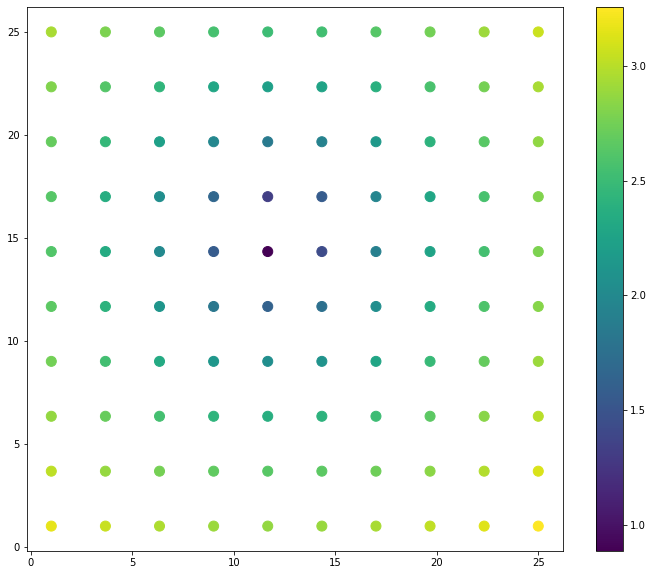

In [151]:
def chi2(a,b):
    return ((15-a)**2+(12-b)**2)**0.2 #note, this is nonsense, but should return a different value for each input a,b

# Solution 
a = np.linspace(1,25,10)
b = np.linspace(1,25,10)
chi2_values = []
for i in a:
    for j in b:
        chi2_values.append(chi2(i,j))

chi2_values = np.array(chi2_values)

xx,yy = np.meshgrid(a,b)

fig, ax = plt.subplots(figsize=(12,10))

im = ax.scatter(xx,yy,c=chi2_values,marker='o',s=100)
plt.colorbar(im);

## Question 7 

Re-show your final plot above, making the following changes:

- label your colorbar as $\chi^2$ using latex notation, with a fontsize>13
- Make your ticks point inward and be longer
- Make your ticks appear on the top and right hand axes of the plot as well 
- If you didn't already, label the x and y axes appropriately and with a font size > 13 
- Make sure the numbers along the axes have fontsizes > 13


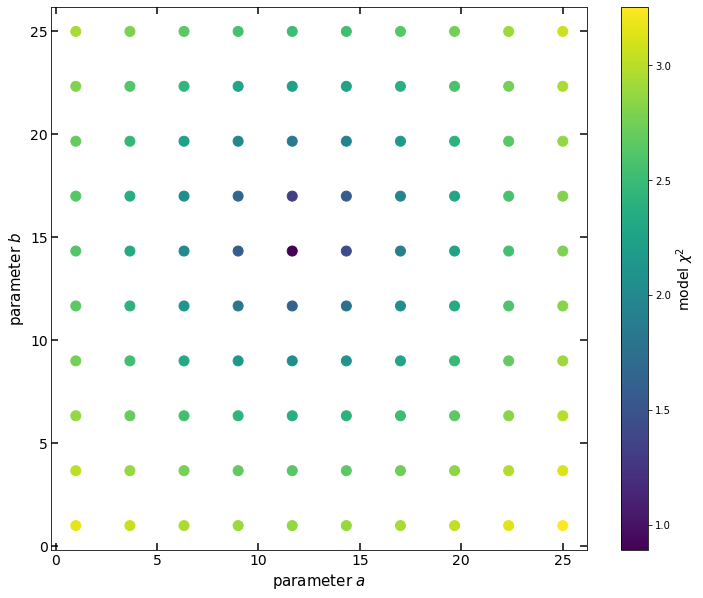

In [152]:
fig, ax = plt.subplots(figsize=(12,10))

im = ax.scatter(xx,yy,c=chi2_values,marker='o',s=100)
ax.tick_params(direction='in',right=True,top=True,length=7,width=1.5,labelsize=14)
ax.set_xlabel(r'parameter $a$',fontsize=15)
ax.set_ylabel(r'parameter $b$',fontsize=15)
cbar = plt.colorbar(im)
cbar.set_label(r'model $\chi^2$',fontsize=14);

## Question 8

Some quick list comprehensions! For any unfamilar, **comprehensions** are pythonic statements that allow you to compress a for-loop (generally) into a single line, and usually runs faster than a full loop (but not by a ton). 

Take the for-loop below and write it as a list comprehension.

In [119]:
visited_cities = ['San Diego', 'Boston', 'New York City','Atlanta']
all_cities = ['San Diego', 'Denver', 'Boston', 'Portland', 'New York City', 'San Francisco', 'Atlanta']

not_visited = []
for city in all_cities:
    if city not in visited_cities:
        not_visited.append(city)
        
print(not_visited)

['Denver', 'Portland', 'San Francisco']


In [121]:
# Solution 

not_visited = [i for i in all_cities if i not in visited_cities]
print(not_visited)

['Denver', 'Portland', 'San Francisco']


Next, create an array of integers including 1 through 30, inclusive. Using a comprehension, create a numpy array containing the squared value of only the odd numbers in your original array. (*Hint, remember the modulo operator*)

In [122]:
# Solution 
full = np.arange(1,31)
squared_odds = np.array([i**2 for i in full if i%2!=0])
print(squared_odds)

[  1   9  25  49  81 121 169 225 289 361 441 529 625 729 841]


In the next example, you have a list of first names and a list of last names. Use a list comprehension to create an array that is a list of full names (with a space between first and last names). 

In [123]:
first_names = ['Bob','Samantha','John','Renee']
last_names = ['Smith','Bee','Oliver','Carpenter']

# Solution
full_names = [i+' '+j for i,j in zip(first_names,last_names)]
print(full_names)

['Bob Smith', 'Samantha Bee', 'John Oliver', 'Renee Carpenter']


```{admonition} Challenge Problem (worth Extra Credit) 
I've created new lists that contain strings of the names in the format Lastname,Firstname, with random leading/trailing spaces and terrible capitalizations. Use a list comprehension to make our nice, "Firstname Lastname" list again.
```

In [129]:
all_names = ['sMitH,BoB   ', '  bee,samanthA',' oLIVER,JOHN ','  caRPENTer,reneE  ']

# solution 
full_names = [i.strip().split(',')[1].upper()[0]
              +i.strip().split(',')[1].lower()[1:]
              +' '
              +i.strip().split(',')[0].upper()[0]
              +i.strip().split(',')[0].lower()[1:]
              for i in all_names]
print(full_names)

['Bob Smith', 'Samantha Bee', 'John Oliver', 'Renee Carpenter']


```{note}
Note that with this last example, we're entering a degree of single-line length and complexity that it almost doesn't make sense to use a comprehension anymore. Just because something CAN be done in one line doesn't mean is has to be, or should be.

```

You may be wondering what use case this type of coding has in astronomy -- turns out, quite a lot. Take this example: you read in a data table and the columns have names like "FLUX HA", "FLUX ERR", etc. 

If you're trying to make a `pandas DataFrame` of this table, it is advantageous to rename these columns something like `flux_ha` and `flux_err`. This way, commands like `df.flux_ha` can be used. 

Being able to iterate over the string list of column names and turn caps into lower case, spaces into underscores, etc., is a useful skill that will come in handy when wrangling data. 

Below, for reference, I show how I myself would do the above example in production code:

In [133]:
def clean_csv_string(str_in,sep=',',formatting='LastFirst'):
    str_stripped = str_in.strip() # remove trailing/leading spaces
    str_split = str_stripped.split(sep) #split at delimiter
    str_cap_correct = [i.upper()[0]+i.lower()[1:] for i in str_split]
    if formatting=='LastFirst':
        out_string = str_cap_correct[1] + ' ' + str_cap_correct[0]
        return out_string
    elif formmatting=='FirstLast':
        out_string = str_cap_correct[0] + ' ' + str_cap_correct[1]
        return out_string
    else:
        raise ValueError('formatting not set correctly')


        
full_names = [clean_csv_string(i) for i in all_names]
print(full_names)

['Bob Smith', 'Samantha Bee', 'John Oliver', 'Renee Carpenter']


By making the string cleaning steps a function, I could take the time to explain what is going on within the function, as well as control for additional possibilities (like the names being in First,Last formatting). I could make this function more robust and complex, and my final comprehension stays readable and simple, as I loop over the names and run each through my handy functions (with some settings tweaked, potentially). 

## Question 9 

Take the arrays `XX`, `YY`, and `ZZ` below and create one multidimensional array in which they are the columns. Print to confirm this worked.

In [131]:
XX = np.array([1,2,3,4,5,6,7,8,9])
YY = np.array([5,6,7,8,9,10,11,12,13])
ZZ = np.array([10,11,12,13,14,15,16,17,18])

#solution
cols = np.column_stack((XX,YY,ZZ))
cols

array([[ 1,  5, 10],
       [ 2,  6, 11],
       [ 3,  7, 12],
       [ 4,  8, 13],
       [ 5,  9, 14],
       [ 6, 10, 15],
       [ 7, 11, 16],
       [ 8, 12, 17],
       [ 9, 13, 18]])

## Question 10 

Units, units, units. The bane of every scientists' existence... except theorists that set every constant equal to 1. 

In the real world, we measure fluxes or magnitudes in astronomical images, infer temperatures and densities from data and simulations, and ultimately have to deal with units one way or another. 

Thankfully, our friends at `astropy` know this, and they've come to save the day. This next question serves as an introduction to the `units` module in astropy, which can be both a live saver and a pain in the ass, but at the end of the day is absolutely worth learning.

In [137]:
import astropy.units as u

The standard import for this library is `u`, so be careful not to name any variables that letter. 

To "assign" units to a variable, we multiply by the desired unit as follows. Note that generally the module knows several aliases/common abrreviations for a unit, if it is uniquely identifiable.

In [138]:
star_temp = 5000*u.K 
star_radius = 0.89 * u.Rsun 
star_mass = 0.6 * u.Msun

We can perform trivial conversions using the `.to()` method.

In [139]:
star_radius.to(u.km)

<Quantity 619173. km>

Once we attach units to something, it is now a `Quantity` object. Quantity objects are great, above, we saw they have built-in methods to facilitate conversion. They can also be annoying -- sometimes another function we've written needs just the raw value or array back out. To get this, we use the `.value` attribute of a quantity object:

In [140]:
star_mass.to(u.kg).value

1.1930459224188305e+30

This now strips away all `Quantity` stuff and gives us an array or value to use elsewhere in our code. 

Units are great because they help us combine quantities while tracking units and dimensional analysis. A common operation in astronomy is converting a flux to a luminosity given a distance, using 

$$
F = \frac{L}{4\pi D^2}
$$
where $L$ is the luminosity and $D$ is the distance to the source. 

What if I've made a flux measurement in astronomical units such as erg/s/cm$^2$, and I want to know the luminosity in solar luminosities, and my distance happens to be in Mpc? Regardless of my input units, I can easily do this:

In [141]:
L = 4 * np.pi * (3.6*u.Mpc)**2 * (7.5e-14 * u.erg/u.s/u.cm**2)
L.to(u.Lsun)

<Quantity 30381.22564638 solLum>

This conversion worked because the units worked out. If my units of flux weren't correct, I'd get an error:

In [142]:
L = 4 * np.pi * (3.6*u.Mpc)**2 * (7.5e-14 * u.erg/u.s/u.cm**2/u.AA)
L.to(u.Lsun)

UnitConversionError: 'erg Mpc2 / (Angstrom cm2 s)' and 'solLum' (power) are not convertible

Here, `units` realized that I was putting in units of flux density, but wanted a luminosity out, and ultimately those units don't resolve out. Thus, it can be a great way to catch errors in your inputs. 

Note: just be careful that sometimes, you throw a constant into an equation but the constant has some units. If you're going to use the unit module to do a calculation, ALL inputs that HAVE units must be assigned them correctly as above for it to work.

For your exercise, consider the following: 
    
The virial temperature of a galaxy halo is given roughly by 

$$
T_{\rm vir} \simeq 5.6\times10^4\;\textrm{K}\left(\frac{\mu}{0.59}\right)\left(\frac{M_{\rm halo}}{10^{10}\; M_{\odot}}\right)^{2/3}\left(\frac{1+z}{4}\right)
$$

where here, we can assume $\mu$ is 0.59. 

Write a function that takes as an input a halo mass, redshift, and optionally $\mu$ (default 0.59), and returns the virial temperature in Kelvin. Your function should take in an astropy quantity with mass units, but should allow for the mass to be input with any appropriate units. 

In [144]:
# Solution 

def Tvir(M,z,mu=0.59):
    return ((5.6e4*u.K)*(mu/0.59)*(M/(1e10*u.Msun))**(2/3.)*((1+z)/4)).to(u.K)

Tvir(10**11*u.Msun,z=3)

<Quantity 259928.97468232 K>